In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
# from inchworm_measurement import simulator
from inchworm_measurement.simulator import Simulator

### 直進運動テスト

threshold: 0
2.8047184286991026e-10
2.8047184286991026e-10
2.8047184286991026e-10
2.8047198033807445e-10
2.804720093469346e-10
2.8047184286768546e-10
2.8047196711341796e-10
2.804718851442328e-10
9.780858404650526e-09
2.9935708574478535e-09
2.993606335384672e-09
2.993436220884985e-09
2.9932308872712263e-09
2.9931936377193185e-09
2.99336616928871e-09
9.201475569067528e-09
4.3870075328017094e-10
9.569635744862961e-11
9.569635744862961e-11
9.569635744862961e-11
9.569648125618133e-11
9.569650451257192e-11
9.569635744806792e-11
9.569644898448227e-11
9.569639315440241e-11
8.799649549881514e-09
2.6840057089721547e-09
2.6840286487183075e-09
2.6839369193889374e-09
2.6838219591491384e-09
2.683800101864429e-09
2.6838919943298127e-09
8.749955210820005e-09
1.351167875686881e-10
1.2697597307180122e-10
1.2697597307180122e-10
1.2697597307180122e-10
1.2697614408181897e-10
1.269761345111657e-10
1.2697597307180122e-10
1.2697607041798414e-10
1.269760464671774e-10
7.822489235605201e-09
2.3876606415736693e-0

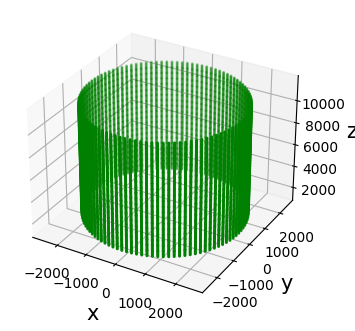

threshold: 0.5
2.5287158097489405e-05
2.5287158097489405e-05
2.5287158097489405e-05
2.5287223360455725e-05
2.5287159625650585e-05
2.5287158031347814e-05
2.528715950432054e-05
2.5287096728536836e-05
2.5287223193711865e-05
2.5287158274031397e-05
2.5287157800118872e-05
2.5287158252412324e-05
2.528715827330405e-05
2.528715829448805e-05
2.5287158294856217e-05
2.528715976675987e-05
9.732829110314819e-06
3.639208156810617e-15
3.639208156810617e-15
3.639208156810617e-15
3.639208089068438e-15
2.2841154701436532e-10
3.639208152198043e-15
1.9528424460546986e-10
3.6392082359219904e-15
8.766573653615562e-09
2.556642627074017e-09
2.6192839294281866e-09
2.7437847145583565e-09
2.80566698447384e-09
2.743785329139149e-09
2.6192841474651552e-09
8.750110852715566e-09
3.8208714510028714
8.859106922922808e-15
8.859106922922808e-15
8.859106922922808e-15
8.859107059757534e-15
3.6334286186614617e-10
8.859106935315406e-15
3.100192644952061e-10
8.859106758280218e-15
7.773302725766952e-09
2.1872792397346986e-09
2

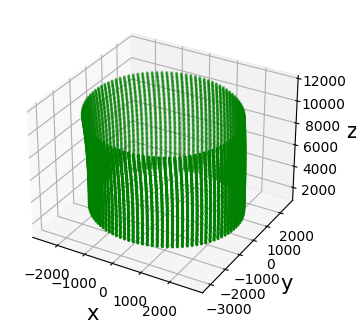

threshold: 1
5.1318681198573154e-15
5.1318681198573154e-15
5.1318681198573154e-15
5.131868182973547e-15
4.063106294772708e-10
5.131868125144088e-15
3.467295503343302e-10
5.131868045980551e-15
9.723084742427494e-09
2.7493443922846892e-09
2.8722119902090496e-09
3.0975172144232123e-09
3.200064946551587e-09
3.0975180132149474e-09
2.8722148125646454e-09
9.196061241424895e-09
0.1773281186847652
3.705156253142365e-15
3.705156253142365e-15
3.705156253142365e-15
3.705156289711705e-15
5.614378380460018e-10
3.705156255915024e-15
4.783669059553861e-10
3.705156211533001e-15
8.727583040724512e-09
2.3723609537030495e-09
2.5362692773723823e-09
2.8423492251541277e-09
2.984824268583043e-09
2.8423503993200566e-09
2.536267336488391e-09
8.750110191784276e-09
3.507816090462677
7.70888708105066e-05
7.70888708105066e-05
7.70888708105066e-05
7.708896242388613e-05
7.708887362996372e-05
7.708887060194678e-05
7.708887326877018e-05
7.708878800069787e-05
7.708895780071446e-05
7.708887084791031e-05
7.708886950682649

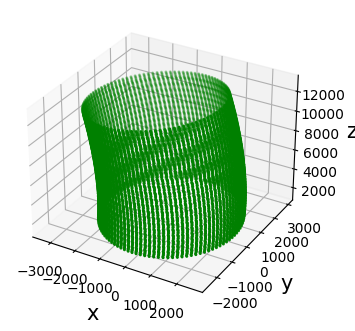

ground truth


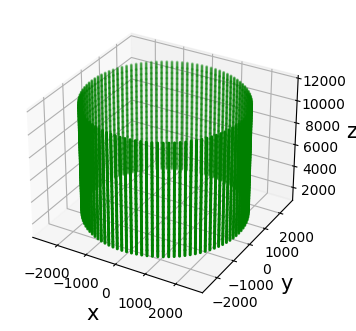

In [5]:
sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1500],
    [0, 0, 0, 1]
])


simulator_params = {\
    "A": A, \
    "n_spot": 7, \
    "n_ring": 100, \
    "cylinder_radius": 2500, \
    "base_motion": base_motion, \
    "spotlaser_offset": spotlaser_offset, \
    "ringlaser_offset": ringlaser_offset, \
    "is_ring_with_camera": True, \
    "idx_length": 100,
    "idx_period": 5,
    "round_threshold": 0.5, \
    "is_bundle": True, \
    "is_5points_true": False, \
    "is_scale_true": False, \
}

S = Simulator()
for i in [0, 0.5, 1]:
    print(f"threshold: {i}")
    simulator_params["round_threshold"] = i
    S.set_params(**simulator_params)
    S.run()
    # S.calc_error()
    # print(f"Error: {S.error}")
    S.show_result()

print("ground truth")
S.show_groundtruth()
S.calc_error_pose_adjacent()

### x軸方向に周期的に姿勢変換を伴う（±3度）

threshold: 120
Error: [ 2.51341935e-01  4.00365936e-03 -6.41177770e-04 -1.26374707e+01
  7.90997622e+02 -6.05506647e+02]


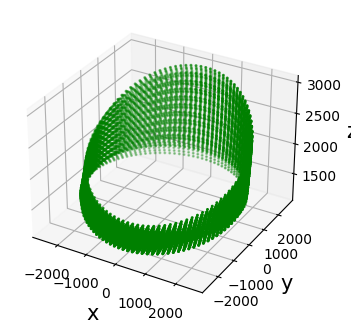

ground truth


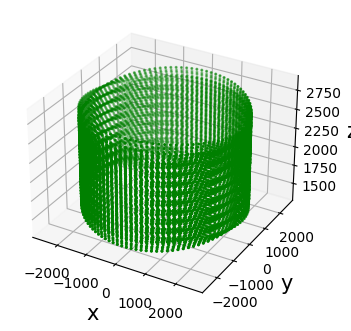

In [5]:
from scipy.spatial.transform import Rotation

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])

T = []
for i in range(121):
    max_deg = 3
    deg = (np.min([i%(max_deg*4), (max_deg*4)-i%(max_deg*4)])-max_deg)
    R = Rotation.from_rotvec([deg*np.pi/180,0,0]).as_matrix()
    # t = np.array([[0,0, 0]]).T
    t = np.array([[0,0, 10*i]]).T
    T.append(np.vstack([np.hstack([R,t]), np.array([[0,0,0,1]])]))
base_motion = np.array(T)

spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1500],
    [0, 0, 0, 1]
])


simulator_params = {\
    "A": A, \
    "n_spot": 7, \
    "n_ring": 100, \
    "cylinder_radius": 2500, \
    "base_motion": base_motion, \
    "spotlaser_offset": spotlaser_offset, \
    "ringlaser_offset": ringlaser_offset, \
    "is_ring_with_camera": True, \
    "idx_length": 120,
    "idx_period": 6,
    "round_threshold": 0.5, \
    "is_bundle": False, \
    "is_5points_true": False, \
    "is_scale_true": False, \
}

S = Simulator()
# for i in [0, 0.5, 1]:
print(f"threshold: {i}")
simulator_params["round_threshold"] = 0
S.set_params(**simulator_params)
S.run()
# S.calc_error()
S.calc_error_pose_adjacent()
print(f"Error: {S.error_pose_adjacent.sum(axis=1)}")
S.show_result()

print("ground truth")
S.show_groundtruth()


In [9]:
print(f"Error: {np.abs(S.error_pose_adjacent).sum(axis=1)}")
print(f"Error: {np.abs(S.error_pose_adjacent)}")


Error: [2.51341936e-01 4.00366291e-03 6.41180075e-04 1.26374830e+01
 7.90997625e+02 6.05506654e+02]
Error: [[3.84631204e-04 3.85914936e-04 3.87205051e-04 3.88501591e-04
  2.35879406e-02 1.09287579e-15 3.75416461e-18 1.38302564e-13
  2.42680875e-13 2.62188535e-12 6.00761108e-12 1.04929468e-11
  8.32459379e-11 2.15840474e-18 3.84631204e-04 3.85914936e-04
  3.87205051e-04 3.88501590e-04 2.35879406e-02 2.31790281e-13
  2.15898082e-17 3.27016192e-13 4.00506017e-13 2.59101421e-12
  2.47720594e-12 8.32223665e-11 2.63701158e-10 7.66962729e-19
  3.84631204e-04 3.85914936e-04 3.87205051e-04 3.88501591e-04
  2.35879406e-02 9.29603616e-14 4.75955678e-18 1.85618881e-13
  5.77916187e-13 2.07380640e-12 9.90200977e-13 4.45566119e-11
  1.45293316e-10 2.97782625e-18 3.84631204e-04 3.85914936e-04
  3.87205051e-04 3.88501590e-04 2.35879406e-02 5.81413390e-13
  1.95323561e-17 2.48471382e-13 7.40598555e-13 4.93049698e-12
  1.16746959e-11 2.26227023e-11 4.70887416e-10 8.65197333e-18
  3.84631204e-04 3.859149

### スポットレーザ配置色々

In [11]:
from inchworm_measurement.laser import Laser
from inchworm_measurement import utils

origin1 = np.zeros((3,4))
direction1 = np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0]]).T
S1 = Laser(origin1, direction1)

origin2 = np.zeros((3,4))
origin2[2,:] = 1000
direction2 = np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0]]).T
S2 = Laser(origin1, direction1)


sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1500],
    [0, 0, 0, 1]
])


simulator_params = {\
    "A": A, \
    "n_spot": 7, \
    "n_ring": 100, \
    "cylinder_radius": 2500, \
    "base_motion": base_motion, \
    "spotlaser_offset": spotlaser_offset, \
    "ringlaser_offset": ringlaser_offset, \
    "is_ring_with_camera": True, \
    "idx_length": 100,
    "idx_period": 5,
    "round_threshold": 0.5, \
    "is_bundle": True, \
    "is_5points_true": False, \
    "is_scale_true": False, \
}

S = Simulator()
S.S1 = S1
S.S2 = S2

i=1
print(f"threshold: {i}")
simulator_params["round_threshold"] = i
S.set_params(**simulator_params)
S.run()
# S.calc_error()
# print(f"Error: {S.error}")
S.show_result()


threshold: 1


/Users/higuchi/dev/InchwormMeasurement/inchworm_measurement/utils.py:130: RuntimeWarning: divide by zero encountered in divide
  Q = P / np.tile(P[n-1:n, :], (n, 1))
/Users/higuchi/dev/InchwormMeasurement/inchworm_measurement/utils.py:130: RuntimeWarning: invalid value encountered in divide
  Q = P / np.tile(P[n-1:n, :], (n, 1))


error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-1/_work/opencv-python/opencv-python/opencv/modules/core/src/matrix.cpp:1174: error: (-13:Image step is wrong) The matrix is not continuous, thus its number of rows can not be changed in function 'reshape'


In [236]:
print(base_motion)

[[[-9.92257568e-01  0.00000000e+00  1.24197100e-01  0.00000000e+00]
  [-0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-1.24197100e-01 -0.00000000e+00 -9.92257568e-01  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 9.96556448e-01 -0.00000000e+00 -8.29171087e-02  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00 -0.00000000e+00  0.00000000e+00]
  [ 8.29171087e-02  0.00000000e+00  9.96556448e-01  1.00000000e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-9.99138741e-01  0.00000000e+00  4.14942917e-02  0.00000000e+00]
  [-0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-4.14942917e-02 -0.00000000e+00 -9.99138741e-01  2.00000000e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.0000

In [240]:
T = []
for i in range(11):
    loop = 3
    deg = np.min([i%(loop*4), (loop*4)-i%(loop*4)])-loop
    print(deg)
    R = Rotation.from_rotvec([0,10*np.pi/180,0]).as_matrix()
    # t = np.array([[0,0, 100*i]]).T
    t = np.array([[0,0, 10*i]]).T
    T.append(np.vstack([np.hstack([R,t]), np.array([[0,0,0,1]])]))
base_motion = np.array(T)
print(base_motion)

-3
-2
-1
0
1
2
3
2
1
0
-1
[[[  0.98480775   0.           0.17364818   0.        ]
  [  0.           1.           0.           0.        ]
  [ -0.17364818   0.           0.98480775   0.        ]
  [  0.           0.           0.           1.        ]]

 [[  0.98480775   0.           0.17364818   0.        ]
  [  0.           1.           0.           0.        ]
  [ -0.17364818   0.           0.98480775  10.        ]
  [  0.           0.           0.           1.        ]]

 [[  0.98480775   0.           0.17364818   0.        ]
  [  0.           1.           0.           0.        ]
  [ -0.17364818   0.           0.98480775  20.        ]
  [  0.           0.           0.           1.        ]]

 [[  0.98480775   0.           0.17364818   0.        ]
  [  0.           1.           0.           0.        ]
  [ -0.17364818   0.           0.98480775  30.        ]
  [  0.           0.           0.           1.        ]]

 [[  0.98480775   0.           0.17364818   0.        ]
  [  0.       

In [2]:
x = []
x.append([])
x.append(1)
print(x)


[[], 1]
